In [14]:
import pandas as pd

In [15]:
df= pd.read_csv('emails.csv')

In [16]:
df.shape

(5172, 3002)

In [17]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#input data
x=df.drop(['Email No.','Prediction'],axis=1)

#output data
y=df['Prediction']

In [25]:
x.shape

(5172, 3000)

In [26]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [27]:
set(x.dtypes)

{dtype('int64')}

<AxesSubplot:xlabel='Prediction', ylabel='count'>

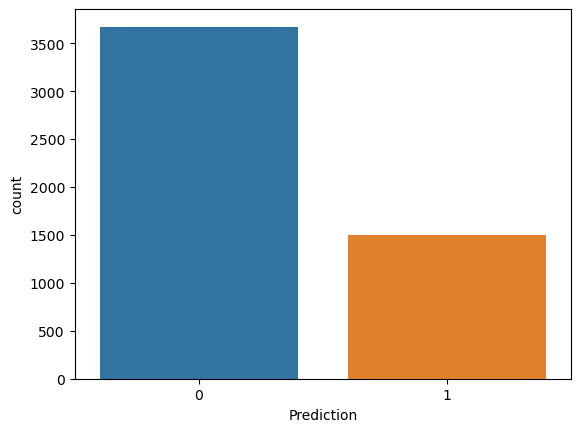

In [29]:
import seaborn as sns
sns.countplot(x=y)

In [30]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [32]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size=0.25)

In [35]:
x_scaled.shape

(5172, 3000)

In [36]:
x_train.shape

(3879, 3000)

In [41]:
x_test.shape

(1293, 3000)

In [42]:
#import the class
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#create an object
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
#Train an algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
#Predict on test data
y_pred = knn.predict(x_test)

# import warnings filter - this used to throw exceptions or runtime warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [48]:
#import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

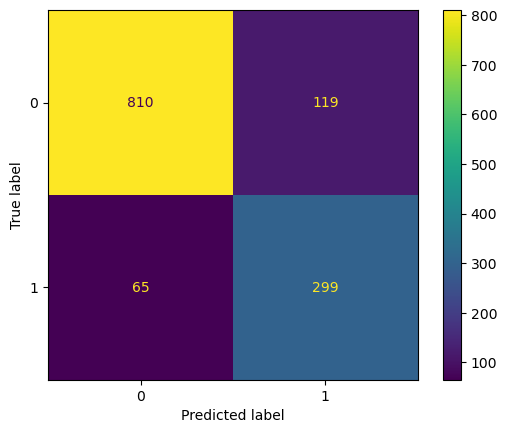

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [50]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [51]:
accuracy_score(y_test,y_pred)

0.8576952822892498

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       929
           1       0.72      0.82      0.76       364

    accuracy                           0.86      1293
   macro avg       0.82      0.85      0.83      1293
weighted avg       0.87      0.86      0.86      1293



In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
# import warnings filter -  this used to throw exceptions or runtime warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [57]:
error

[0.1423047177107502,
 0.12761020881670534,
 0.14694508894044858,
 0.13225058004640372,
 0.1423047177107502,
 0.13611755607115236,
 0.14153132250580047,
 0.1368909512761021,
 0.14153132250580047,
 0.1368909512761021,
 0.14617169373549885,
 0.13843774168600154,
 0.14617169373549885,
 0.14075792730085074,
 0.14694508894044858,
 0.139984532095901,
 0.1430781129156999,
 0.13921113689095127,
 0.13766434648105183,
 0.13611755607115236,
 0.14153132250580047,
 0.13225058004640372,
 0.1368909512761021,
 0.1368909512761021,
 0.13921113689095127,
 0.13766434648105183,
 0.139984532095901,
 0.14153132250580047,
 0.1430781129156999,
 0.14462490332559938,
 0.1423047177107502,
 0.1453982985305491,
 0.1430781129156999,
 0.14926527455529776,
 0.1500386697602475,
 0.14926527455529776,
 0.14926527455529776,
 0.14926527455529776,
 0.1500386697602475,
 0.15467904098994587]

In [107]:
knn=KNeighborsClassifier(n_neighbors=1)

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
y_pred = knn.predict(x_test)

# import warnings filter -  this used to throw exceptions or runtime warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [110]:
accuracy_score(y_test,y_pred)

0.8576952822892498

In [111]:
from sklearn.svm import SVC

In [112]:
#svm = SVC(kernel = 'linear')
#svm = SVC(kernel = 'poly')
svm = SVC(kernel = 'rbf')

In [113]:
svm.fit(x_train,y_train)

SVC()

In [114]:
y_pred = svm.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred)

0.7996906419180201

In [ ]:
#Outputs of SVM :- 
# 1. linear = 0.954369682907966
# 2. polynomial = 0.7540603248259861
# 3. RBF = 0.7996906419180201